## Projeto de Disciplina - Validação de modelos de clusterização [25E4_3]
### Aluna: Rosana Ribeiro Lima

O código e demais artefatos deste projeto se encontram disponibilizados em https://github.com/roriblim/PD-validacao-clusterizacao

Além disso, o resultado das músicas clusterizadas de forma interativa pode ser visualizado em: https://roriblim.github.io/PD-validacao-clusterizacao/src/tsne_clusters.html

Destaque-se ainda que o t-SNE **não** foi utilizado em nenhuma etapa prévia ou concomitante à clusterização, e sim apenas foi utilizado ao final de todo o processo, para facilitar a visualização. 

### Parte 1 - Infraestrutura

O projeto foi desenvolvido dentro de um ambiente virtual Python 3.12, criado por meio do Anaconda versão 25.5.1. As bibliotecas e dependências encontram-se no requirements.txt, que foi criado a partir do requirements.in. Mais detalhes sobre a configuração feita e sobre como o ambiente foi montado encontram-se no README do projeto Github mencionado acima.

- Captura de tela do ambiente rodando na minha máquina:

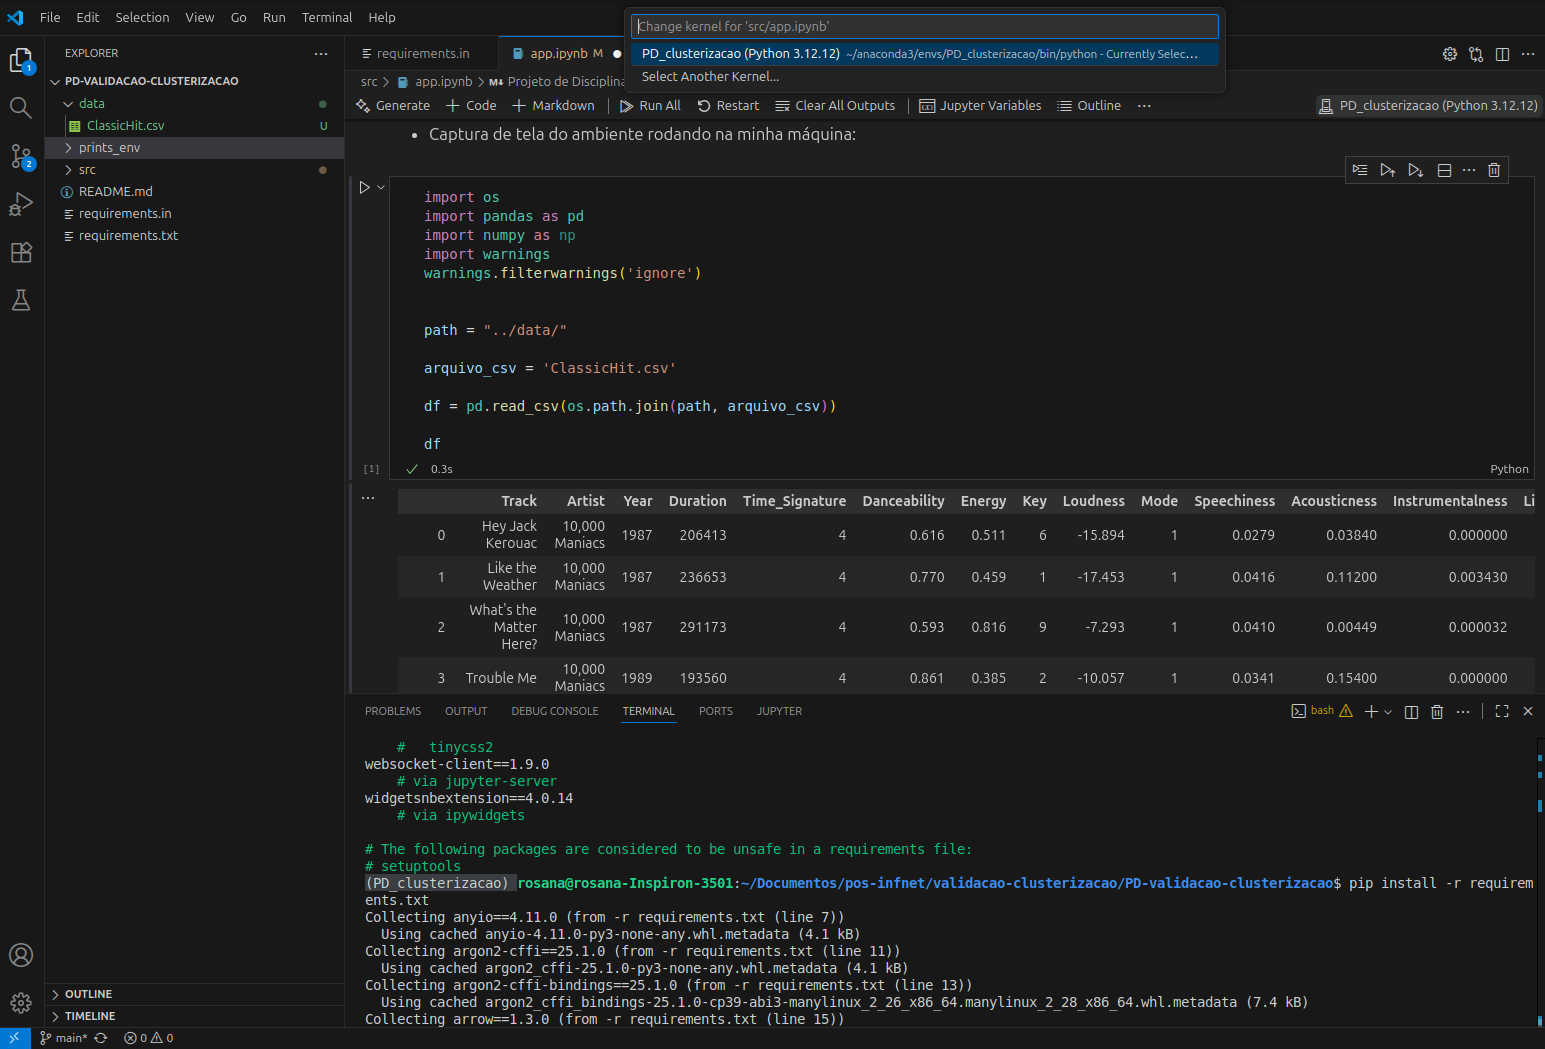

### Parte 2 - Base de dados

#### 2.1 Escolha da base de dados

A base escolhida é uma base do Kaggle com dados técnicos de cerca de 15000 músicas do Spotify: https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023

In [411]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


path = "../data/"

arquivo_csv = 'ClassicHit.csv'

df = pd.read_csv(os.path.join(path, arquivo_csv))

df

Track          Artist  Year  Duration  \
0                    Hey Jack Kerouac  10,000 Maniacs  1987    206413   
1                    Like the Weather  10,000 Maniacs  1987    236653   
2             What's the Matter Here?  10,000 Maniacs  1987    291173   
3                          Trouble Me  10,000 Maniacs  1989    193560   
4               Candy Everybody Wants  10,000 Maniacs  1992    185960   
...                               ...             ...   ...       ...   
15145  7 Seconds (feat. Neneh Cherry)  Youssou N'Dour  1994    306226   
15146                          Birima  Youssou N'Dour  1995    228373   
15147                             Set  Youssou N'Dour  2004    226826   
15148                Africa Remembers  Youssou N'Dour  2007    560466   
15149                       Wiri-Wiri  Youssou N'Dour  2007    247466   

       Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                   4         0.616   0.511    6   -15.894     1       0.0279   
1                   4         0.770   0.459    1   -17.453     1       0.0416   
2                   4         0.593   0.816    9    -7.293     1       0.0410   
3                   4         0.861   0.385    2   -10.057     1       0.0341   
4                   4         0.622   0.876   10    -6.310     1       0.0305   
...               ...           ...     ...  ...       ...   ...          ...   
15145               4         0.679   0.659    1   -10.826     0       0.0269   
15146               4         0.692   0.737   10    -7.042     1       0.0512   
15147               4         0.733   0.730    0   -11.056     1       0.0479   
15148               4         0.696   0.378    5   -16.181     0       0.0797   
15149               4         0.654   0.516    5   -10.325     1       0.0707   

       Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0           0.03840          0.000000    0.1500    0.604  132.015          40   
1           0.11200          0.003430    0.1450    0.963  133.351          43   
2           0.00449          0.000032    0.0896    0.519   99.978          12   
3           0.15400          0.000000    0.1230    0.494  117.913          47   
4           0.01930          0.006840    0.0987    0.867  104.970          43   
...             ...               ...       ...      ...      ...         ...   
15145       0.07710          0.000004    0.3160    0.528  154.171          47   
15146       0.25400          0.017400    0.1120    0.808  105.754          18   
15147       0.04240          0.000101    0.0282    0.840  146.213          25   
15148       0.44400          0.019400    0.0850    0.551   97.677           8   
15149       0.30400          0.000235    0.1100    0.259   83.013           5   

           Genre  
0      Alt. Rock  
1      Alt. Rock  
2      Alt. Rock  
3      Alt. Rock  
4      Alt. Rock  
...          ...  
15145      World  
15146      World  
15147      World  
15148      World  
15149      World  

[15150 rows x 18 columns]

#### 2.2 Justificativa para a escolha: Motivação e Objetivos

A base de dados escolhida para realizar este trabalho é uma base com dados técnicos de cerca de 15000 músicas do Spotify. 
Para a escolha da base foram levados em consideração três fatores:

1 - Potencial de gerar resultados de clusterização com valor prático. No caso, por meio da clusterização das músicas, é possível por exemplo: identificar perfis musicais de usuáruis, encontrar músicas semelhantes ou do mesmo cluster de uma música específica, além de possivelmente criar playlists de forma automática;

2 - Dados com alta qualidade técnica. Na base escolhida, tem-se uma quantidade considerável de dados (15000 músicas), e para cada uma tem-se dados numéricos contínuos úteis para a clusterização, como: energia, instrumentabilidade, dançabilidade, valência, volume, entre outros. Essas variáveis têm natureza quantitativa e comparável, o que é especialmente adequado para algoritmos de clusterização como K-means, DBSCAN, e clustering hierárquico. Além disso, o fato de serem características técnicas — e não meramente categóricas ou subjetivas — reduz ruído e aumenta a robustez dos agrupamentos.

3 - Complexidade adequada. A combinação entre o número de entradas no dataset e a variedade de atributos permite explorar decisões importantes em clusterização, como: normalização, seleção e interpretação de variáveis, ajuste de hiperparâmetros (exemplo: eps e min_samples no DBSCAN), e comparação entre diferentes algoritmos.



#### 2.3 Faixa dinâmica das variáveis e análise do que deve ser feito

O tratamento inicial dos dados para poder visualizar a faixa dinâmica das variáveis consistirá das seguintes etapas:

2.3.1 - **análise do dataset, quantidade e tipos das variáveis**;

2.3.2 - **remoção de dados nulos e/ou repetidos, se houver**;

2.3.3 - **escolha das variáveis para a clusterização (análise de correlação)**;

2.3.4 - **plot da distribuição de cada variável a ser utilizada na clusterização (por meio de boxplot e histograma contínuo)**.

Cada uma deles será abordado de forma mais detalhada a seguir.


##### 2.3.1 Análise do dataset, quantidade e tipos das variáveis

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [413]:
df.shape

(15150, 18)

In [414]:
df.describe()

Year      Duration  Time_Signature  Danceability        Energy  \
count  15150.000000  1.515000e+04    15150.000000  15150.000000  15150.000000   
mean    1984.709769  2.413028e+05        3.921650      0.574667      0.617691   
std       19.482460  1.057966e+05        0.348322      0.166208      0.239527   
min     1899.000000  2.300000e+04        0.000000      0.000000      0.000098   
25%     1971.000000  1.803700e+05        4.000000      0.461000      0.442000   
50%     1983.000000  2.228525e+05        4.000000      0.582000      0.644000   
75%     1998.000000  2.751530e+05        4.000000      0.696000      0.819000   
max     2024.000000  3.060650e+06        5.000000      0.988000      0.999000   

                Key      Loudness          Mode   Speechiness  Acousticness  \
count  15150.000000  15150.000000  15150.000000  15150.000000  15150.000000   
mean       5.257624     -9.154545      0.696634      0.075791      0.302651   
std        3.569713      4.289558      0.459727      0.077704      0.317793   
min        0.000000    -47.359000      0.000000      0.000000      0.000001   
25%        2.000000    -11.736750      0.000000      0.034325      0.024225   
50%        5.000000     -8.480500      1.000000      0.046400      0.167000   
75%        8.000000     -5.955500      1.000000      0.078400      0.557000   
max       11.000000      0.919000      1.000000      0.950000      0.996000   

       Instrumentalness      Liveness       Valence         Tempo  \
count      15150.000000  15150.000000  15150.000000  15150.000000   
mean           0.091046      0.200062      0.571146    120.664078   
std            0.229075      0.175196      0.250969     29.181107   
min            0.000000      0.012400      0.000000      0.000000   
25%            0.000000      0.091900      0.371000     98.672500   
50%            0.000084      0.130000      0.586000    118.777000   
75%            0.012400      0.257000      0.782000    138.073250   
max            0.987000      0.996000      0.989000    219.973000   

         Popularity  
count  15150.000000  
mean      43.025809  
std       20.788038  
min        0.000000  
25%       28.000000  
50%       44.000000  
75%       59.000000  
max       98.000000

In [415]:
df[df.duplicated(keep=False)]

Track Artist  Year  Duration  Time_Signature  Danceability  Energy  \
3639  Happy Now   Zedd  2019    207029               3         0.503   0.741   
3640  Happy Now   Zedd  2019    207029               3         0.503   0.741   

      Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
3639    4    -5.128     1        0.047         0.579          0.000001   
3640    4    -5.128     1        0.047         0.579          0.000001   

      Liveness  Valence   Tempo  Popularity Genre  
3639    0.0712    0.458  88.335          63   EDM  
3640    0.0712    0.458  88.335          63   EDM

##### 2.3.2 Remoção de dados nulos e/ou repetidos

Como foi possível verificar na análise do item 2.3.1, não há itens nulos no dataset (o df.info() mostrou que tem-se 15150 dados no total, que bate exatamente com a contagem de dados não-nulos de cada atributo).

No entanto, ainda conforme o item 2.3.1, foi possível identificar um dado duplicado, correspondente aos ids 3639 e 3640. Assim, apenas uma dessas duplicatas deve ser mantida:

In [416]:
df = df.drop_duplicates()
df.shape

(15149, 18)

Agora, se verificarmos novamente se há dados duplicados, não encontraremos:

In [417]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Track, Artist, Year, Duration, Time_Signature, Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Popularity, Genre]
Index: []

##### 2.3.3 Escolha das variáveis para a clusterização

De início, já vamos descartar algumas variáveis que não serão interessantes para a análise:

- Track, Artist, Genre: pois queremos variáveis com dados numéricos para a análise.
- Year, Popularity: pois queremos dados mais técnicos referentes à musicalidade em si.
- Mode, Key, Time_Signature, Duration: dados que não interferem tanto no gosto musical. No caso do "Mode", o Modo maior tende a soar mais feliz, mas a Valência já captura esse dado de forma mais precisa.

In [418]:
df_clust = df.drop(columns=['Track', 'Artist', 'Genre', 'Year', 'Popularity', 'Mode', 'Key', 'Time_Signature', 'Duration'])
df_clust

Danceability  Energy  Loudness  Speechiness  Acousticness  \
0             0.616   0.511   -15.894       0.0279       0.03840   
1             0.770   0.459   -17.453       0.0416       0.11200   
2             0.593   0.816    -7.293       0.0410       0.00449   
3             0.861   0.385   -10.057       0.0341       0.15400   
4             0.622   0.876    -6.310       0.0305       0.01930   
...             ...     ...       ...          ...           ...   
15145         0.679   0.659   -10.826       0.0269       0.07710   
15146         0.692   0.737    -7.042       0.0512       0.25400   
15147         0.733   0.730   -11.056       0.0479       0.04240   
15148         0.696   0.378   -16.181       0.0797       0.44400   
15149         0.654   0.516   -10.325       0.0707       0.30400   

       Instrumentalness  Liveness  Valence    Tempo  
0              0.000000    0.1500    0.604  132.015  
1              0.003430    0.1450    0.963  133.351  
2              0.000032    0.0896    0.519   99.978  
3              0.000000    0.1230    0.494  117.913  
4              0.006840    0.0987    0.867  104.970  
...                 ...       ...      ...      ...  
15145          0.000004    0.3160    0.528  154.171  
15146          0.017400    0.1120    0.808  105.754  
15147          0.000101    0.0282    0.840  146.213  
15148          0.019400    0.0850    0.551   97.677  
15149          0.000235    0.1100    0.259   83.013  

[15149 rows x 9 columns]

Agora, podemos procurar identificar, dentre as variáveis restantes, se existem variáveis altamente correlacionadas (nesse caso, poderíamos utilizar apenas uma delas):

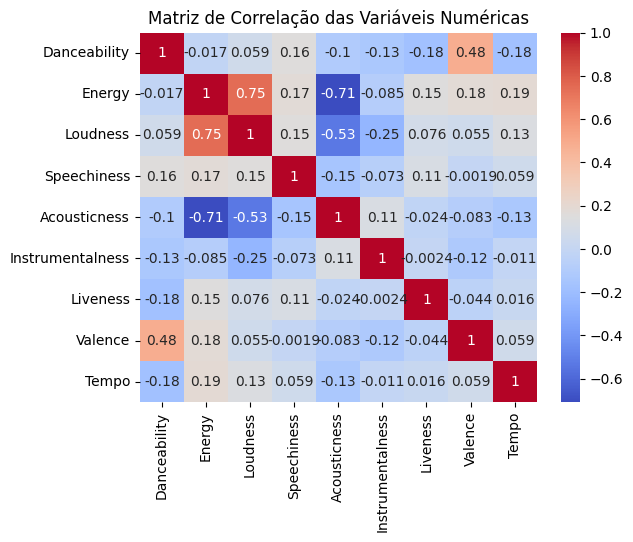


Pares com alta correlação (|corr| >= 0.7):


Variavel_1    Variavel_2  Correlacao
8      Energy      Loudness    0.745855
10     Energy  Acousticness   -0.708695

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlação
corr = df_clust.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

# Encontrar pares altamente correlacionados
# threshold: |correlação| >= 0.7
threshold = 0.7

corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) 
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Variavel_1', 'Variavel_2', 'Correlacao']

high_corr = corr_pairs[abs(corr_pairs['Correlacao']) >= threshold]
print("\nPares com alta correlação (|corr| >= 0.7):")
display(high_corr)


Analisando os dados, é possível observar que os dados em geral apresentam informações significativas, sem muita correlação. Todavia, uma alta correlação pôde ser observada em alguns pares de dados, a saber: Energia e Loudness (Volume / Intensidade Sonora); Energia e Acusticidade. Apesar de alta, essa correlação ainda é abaixo de 80%, então se descartada alguma dessas colunas, corre-se o risco de perder dados importantes e significativos. 

Então serão mantidas essas colunas:



In [420]:
clust_cols = df_clust.columns
clust_cols

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')

##### 2.3.4 Plot de distribuição das variáveis - faixa dinâmica

Agora vamos então plotar a distribuição dessas variáveis:

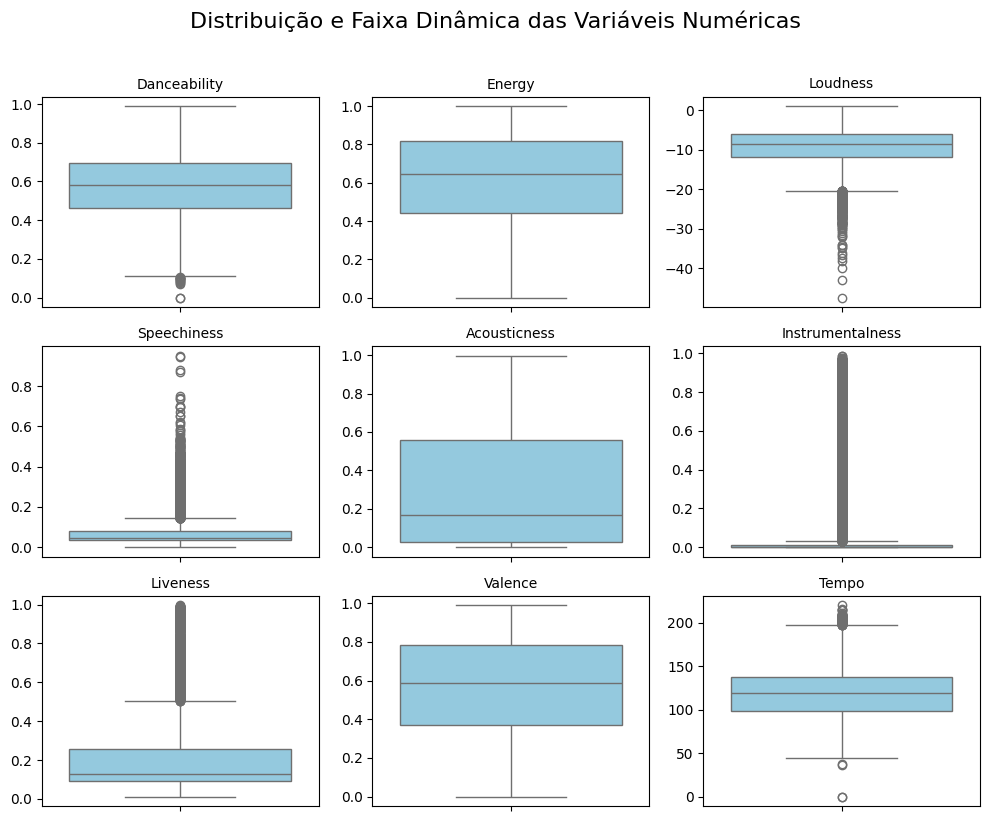

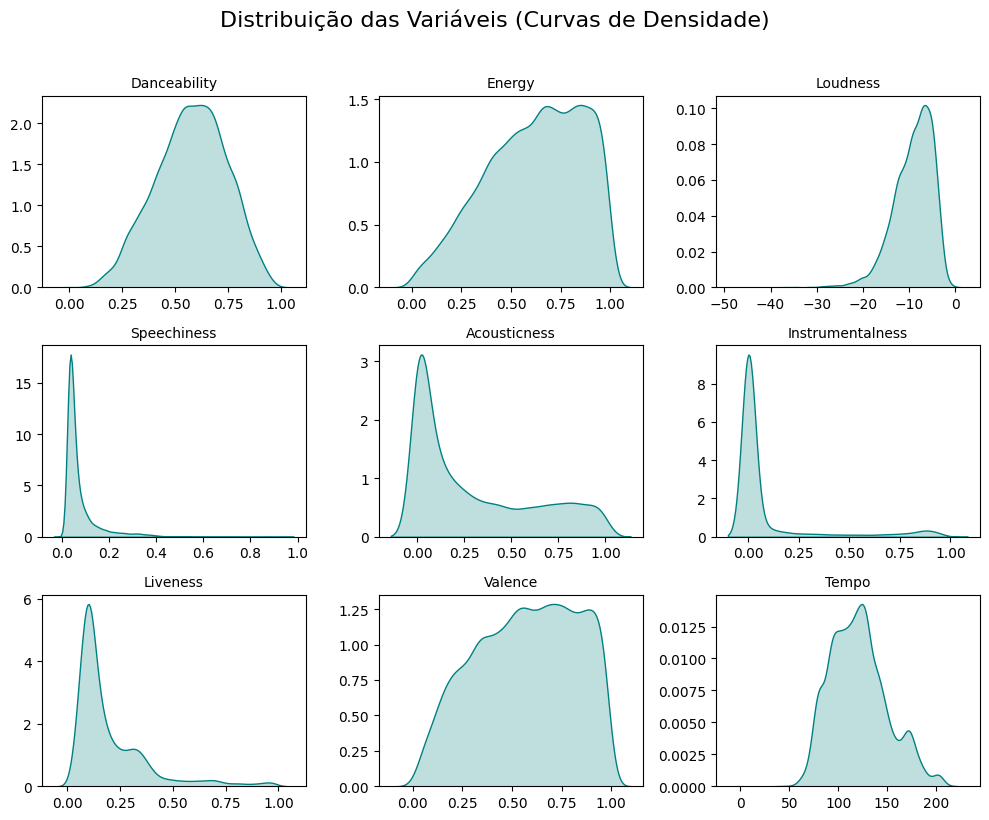

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica das Variáveis Numéricas", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.boxplot(y=df_clust[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.kdeplot(df_clust[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

#### 2.4 Pré-processamento dos dados

Observa-se que muitas dessas variáveis possuem dados bem distribuídos ao longo de sua faixa. Ainda assim, nota-se uma presença significativa de outliers em atributos como Instrumentalness, Speechiness, Loudness e Liveness. No caso, não queremos descartar nenhum outlier, pois nesse dataset em questão, os dados que aparentam ser outliers também contém informações importantes sobre as músicas. Então não serão removidos os dados com outliers.

Porém, os dados não estão em uma mesma escala. Ainda precisamos deixar os dados na mesma escala antes de usá-los como entrada na clusterização, a fim de ter resultados mais confiáveis. Então vamos precisar utilizar o StandardScaler para escalonar os dados sem perder as informações dos outliers.



##### Escalonamento dos dados

In [422]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = df_clust.copy()
df_scaled[clust_cols] = scaler.fit_transform(df[clust_cols])

df_scaled

Danceability    Energy  Loudness  Speechiness  Acousticness  \
0          0.248656 -0.445394 -1.571114    -0.616348     -0.831481   
1          1.175210 -0.662491 -1.934565    -0.440037     -0.599878   
2          0.110275  0.827959  0.434046    -0.447759     -0.938188   
3          1.722718 -0.971435 -0.210328    -0.536558     -0.467713   
4          0.284756  1.078454  0.663214    -0.582888     -0.891584   
...             ...       ...       ...          ...           ...   
15145      0.627701  0.172495 -0.389606    -0.629218     -0.709700   
15146      0.705916  0.498139  0.492562    -0.316491     -0.153035   
15147      0.952596  0.468915 -0.443226    -0.358960     -0.818893   
15148      0.729983 -1.000660 -1.638023     0.050287      0.444853   
15149      0.477286 -0.424520 -0.272807    -0.065538      0.004304   

       Instrumentalness  Liveness   Valence     Tempo  
0             -0.397481 -0.285804  0.130880  0.388925  
1             -0.382507 -0.314344  1.561344  0.434709  
2             -0.397342 -0.630567 -0.207809 -0.708988  
3             -0.397481 -0.439920 -0.307424 -0.094353  
4             -0.367621 -0.578624  1.178824 -0.537911  
...                 ...       ...       ...       ...  
15145         -0.397463  0.661723 -0.171948  1.148214  
15146         -0.321523 -0.502708  0.943734 -0.511044  
15147         -0.397040 -0.981038  1.071240  0.875492  
15148         -0.312792 -0.656823 -0.080303 -0.787843  
15149         -0.396455 -0.514124 -1.243800 -1.290381  

[15149 rows x 9 columns]

A nova distribuição após o escalonamento dos dados então fica assim:

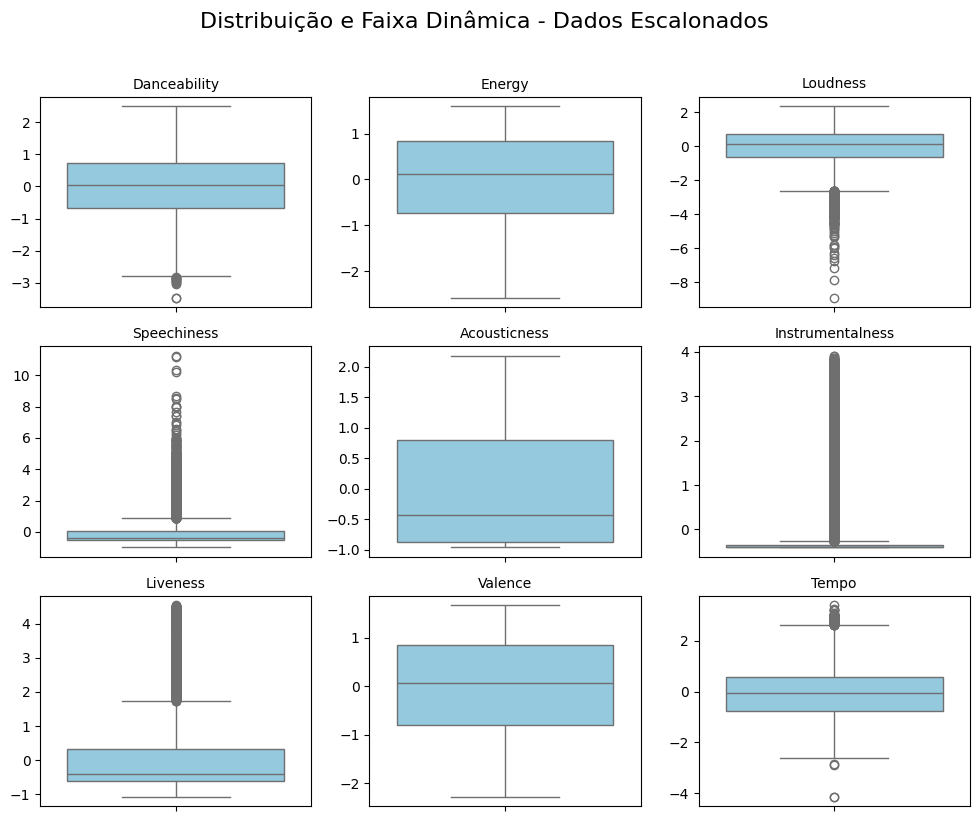

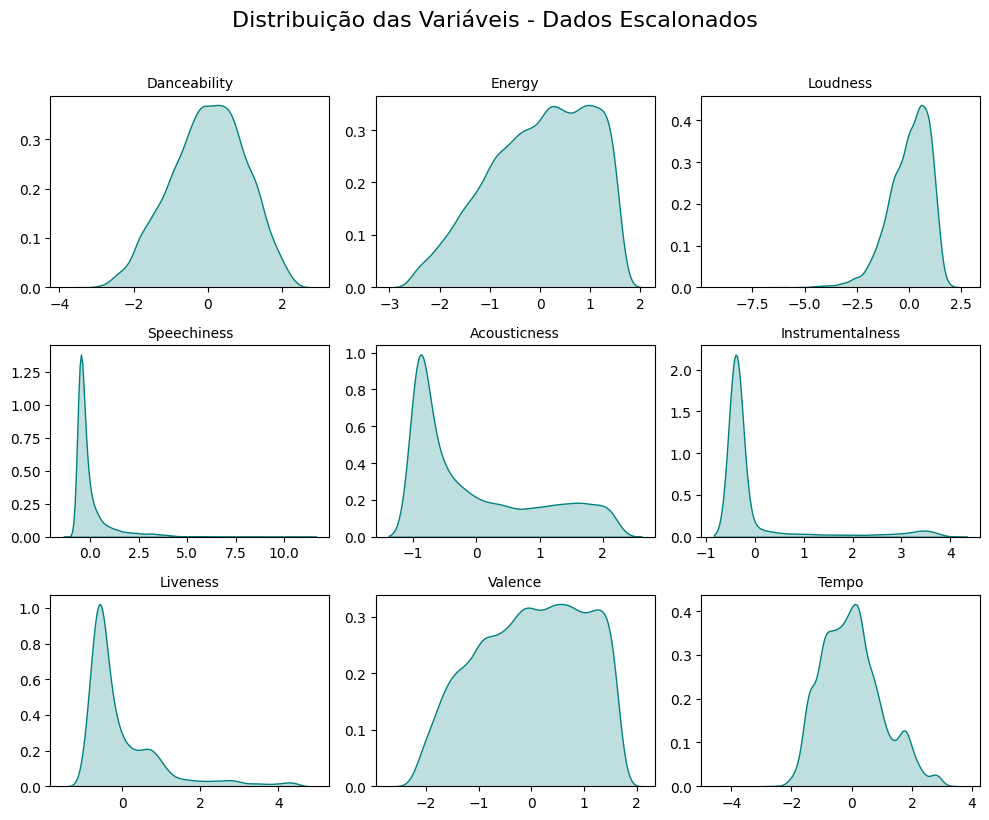

In [423]:
# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.boxplot(y=df_scaled[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.kdeplot(df_scaled[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

### Parte 3 - Clusterização

#### 3.1 Encontrando número adequado de clusters com Índice de Silhueta

##### 3.1.a) K-Médias

A fim de encontrar o número adequado de clusters para o K-Médias usando como referência o Índice de Silhueta, primeiro vamos analisar o intervalo de possibilidades em questão. Para isso, vamos analisar a quantidade de dados que temos, a quantidade de atributos e ainda a quantidade de gêneros musicais em questão:

In [424]:
print(df['Genre'].value_counts())
print(f"\nNúmero de gêneros musicais distintos: {df['Genre'].nunique()}")
print(f"Número de amostras: {df.shape[0]}")
print(f"Número de atributos: {df_scaled.shape[1]}")


Genre
Pop          3669
Metal         922
Country       833
R&B           822
Rock          799
Alt. Rock     780
Jazz          778
Punk          754
Rap           718
EDM           699
Blues         683
Disco         652
Today         620
Folk          575
Reggae        439
Funk          388
SKA           381
World         326
Gospel        311
Name: count, dtype: int64

Número de gêneros musicais distintos: 19
Número de amostras: 15149
Número de atributos: 9


Para a clusterização então, estamos lidando com 19 gêneros musicais distintos, representados por 15149 músicas, cada qual com 9 atributos. No caso, possivelmente teremos então uma quantidade grande de clusters. Como estamos lidando com 19 gêneros musicais, podemos considerar aceitável um intervalo que contenha esse valor.

In [425]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in range(2,30)
]

silhouette_score_list = [
    silhouette_score(df_scaled, cluster_model.labels_) for cluster_model in clusters_per_k
]

max_silhouette_score = max(silhouette_score_list)
best_k = silhouette_score_list.index(max_silhouette_score)+2  # +2 porque o range começa em 2, mas o índice começa em 0

print(f"Melhor k: {best_k} com Silhouette Score: {max_silhouette_score:.4f}")


Melhor k: 2 com Silhouette Score: 0.2154


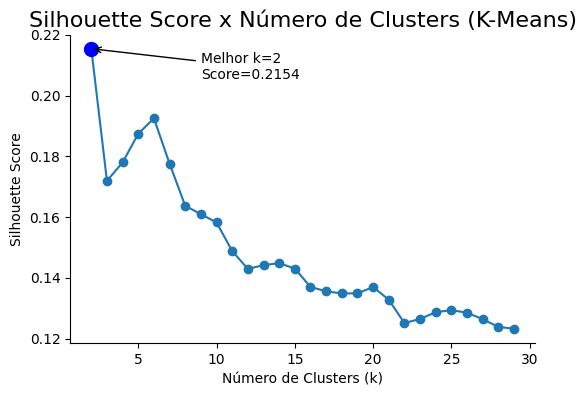

In [426]:
f, ax = plt.subplots(figsize=(6, 4))

ax.plot(range(2,30), silhouette_score_list, marker='o')

ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score x Número de Clusters (K-Means)', fontsize=16)
ax.plot(best_k, max_silhouette_score, marker='o', markersize=10, color='blue')
ax.annotate(f'Melhor k={best_k}\nScore={max_silhouette_score:.4f}', 
            xy=(best_k, max_silhouette_score), 
            xytext=(best_k+7, max_silhouette_score-0.01),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10)
sns.despine()
plt.show()

O melhor k obtido pelo método da Silhueta para o K-Means foi k=2.


In [427]:
k = 2
kmeans_best_silhuette = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
labels_kmeans_best_silhuette = kmeans_best_silhuette.labels_

In [447]:
m_0 = np.sum(labels_kmeans_best_silhuette == 0)
percent_0_kmeans = m_0 / len(labels_kmeans_best_silhuette) * 100

print(f"Quantidade de pontos label 0 - K-Means: {m_0}")
print(f"Percentual de pontos label 0 - K-Means: {percent_0_kmeans:.2f}%")
print('-----------------------------------')

m_1 = np.sum(labels_kmeans_best_silhuette == 1)
percent_1_kmeans = m_1 / len(labels_kmeans_best_silhuette) * 100

print(f"Quantidade de pontos label 1 - K-Means: {m_1}")
print(f"Percentual de pontos label 1 - K-Means: {percent_1_kmeans:.2f}%")

Quantidade de pontos label 0 - K-Means: 4664
Percentual de pontos label 0 - K-Means: 30.79%
-----------------------------------
Quantidade de pontos label 1 - K-Means: 10485
Percentual de pontos label 1 - K-Means: 69.21%


Por fim, vamos analisar rapidamente os resultados para verificar as características de cada Cluster encontrado. Para isso, vamos plotar os centroides e pegar uma música representativa de cada Cluster por meio do ponto mais próximo a esse centroide:

In [428]:
df_com_clusters = df_scaled.copy()
df_com_clusters['cluster_kmeans_best_silhuette'] = labels_kmeans_best_silhuette

cluster_means__kmeans_best_silhuette = df_com_clusters.groupby('cluster_kmeans_best_silhuette').mean(numeric_only=True)

print("\nCentroides de cada cluster (K-Means com melhor Silhueta):")
cluster_means__kmeans_best_silhuette



Centroides de cada cluster (K-Means com melhor Silhueta):


Danceability    Energy  Loudness  Speechiness  \
cluster_kmeans_best_silhuette                                                  
0                                 -0.279493 -1.148900 -0.936026    -0.352783   
1                                  0.124326  0.511061  0.416369     0.156927   

                               Acousticness  Instrumentalness  Liveness  \
cluster_kmeans_best_silhuette                                             
0                                  1.142232          0.232371 -0.096606   
1                                 -0.508095         -0.103365  0.042973   

                                Valence     Tempo  
cluster_kmeans_best_silhuette                      
0                             -0.350797 -0.253825  
1                              0.156044  0.112908

In [429]:
representantes = []

for cluster_id in sorted(df_com_clusters['cluster_kmeans_best_silhuette'].unique()):

    # Seleciona os pontos do cluster (mantém índices originais)
    pontos_cluster = df_scaled.loc[df_com_clusters['cluster_kmeans_best_silhuette'] == cluster_id]
    centroide = cluster_means__kmeans_best_silhuette.loc[cluster_id].values
    distancias = np.linalg.norm(pontos_cluster.values - centroide, axis=1)

    # Índice do ponto mais próximo
    idx_min = distancias.argmin()
    indice_original = pontos_cluster.iloc[idx_min].name

    # Recuperar dados da música original
    musica = df.loc[indice_original, "Track"]
    artista = df.loc[indice_original, "Artist"]

    representantes.append({
        "Cluster": cluster_id,
        "Musica": musica,
        "Artista": artista,

    })

df_representantes = pd.DataFrame(representantes)
df_representantes


Cluster           Musica         Artista
0        0      Buzzin' Fly     Tim Buckley
1        1  Do You Miss Me?  PinkPantheress

Encontramos assim a música mais representativa de cada cluster pelo método de ponto mais próximo de cada centroide.
Vamos a seguir plotar os gráficos com os centroides de cada cluster, a fim de analisá-los.

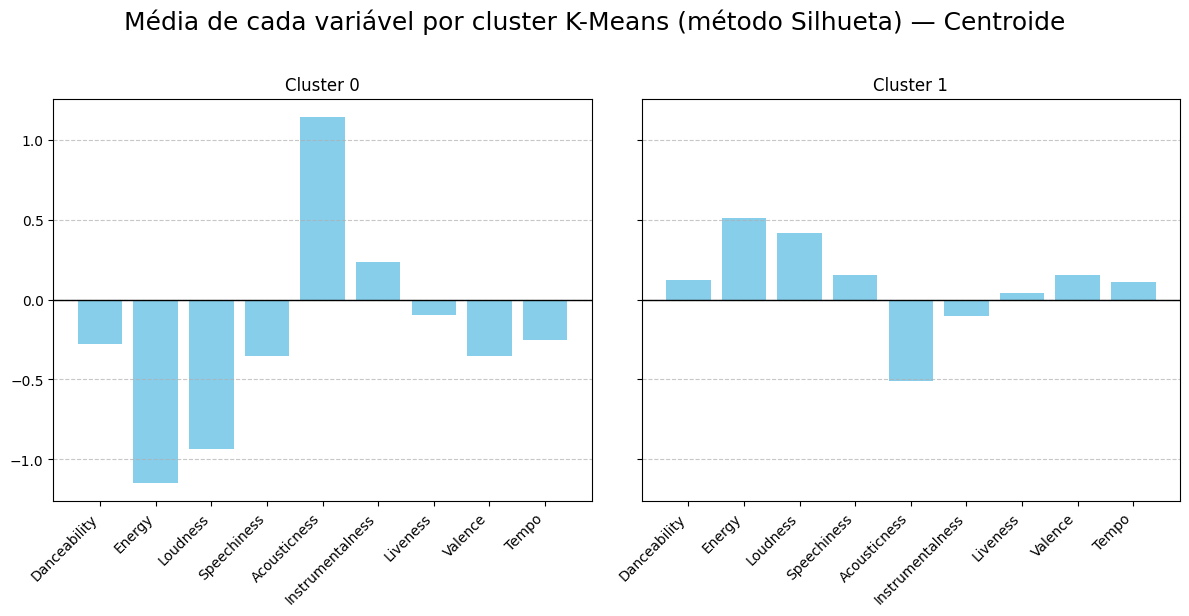

In [430]:
import matplotlib.pyplot as plt

rows, cols = 1, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 6), sharey=True)

axes = axes.flatten()  # facilita o acesso como lista

for i, cluster in enumerate(sorted(df_com_clusters['cluster_kmeans_best_silhuette'].unique())):
    ax = axes[i]
    ax.bar(
        cluster_means__kmeans_best_silhuette.columns,
        cluster_means__kmeans_best_silhuette.loc[cluster],
        color='skyblue'
    )
    ax.set_title(f"Cluster {cluster}")
    ax.set_xticklabels(cluster_means__kmeans_best_silhuette.columns, rotation=45, ha='right')
    ax.axhline(0, color='black', linewidth=1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle(
    "Média de cada variável por cluster K-Means (método Silhueta) — Centroide",
    fontsize=18,
    y=1.02
)

fig.tight_layout()
plt.show()



Com base nesses resultados, já é possível obter algumas informações sobre esses clusters:

O Cluster 0 reúne músicas com características gerais de baixa energia. Elas apresentam níveis bem reduzidos de energy e loudness, indicando faixas mais suaves, menos barulhentas e menos intensas. Também têm danceability abaixo da média, sugerindo que são músicas menos dançantes e menos ritmadas. Por outro lado, possuem valores altos de acousticness, o que aponta para um perfil mais orgânico, com instrumentos acústicos predominando sobre elementos eletrônicos. A instrumentalness aparece ligeiramente acima da média, indicando que algumas dessas músicas podem ter poucos ou nenhum vocal, mas não a ponto de dominarem o cluster. Há também baixa valence, sugerindo um clima mais introspectivo ou melancólico. No geral, esse cluster representa músicas calmas, acústicas, suaves e com clima emocional mais “baixo” — como folk suave, baladas acústicas, trilhas relaxantes ou indie leve. A faixa identificada como mais próxima do centroide é "Buzzin' Fly", do Tim Buckley.

O Cluster 1 reúne músicas com energy e loudness acima da média, indicando faixas mais intensas, altas e vibrantes. Também têm danceability levemente acima da média, o que aponta para um caráter mais rítmico e fácil de dançar. A acousticness é bem baixa, sugerindo forte presença de elementos eletrônicos ou produção moderna. A speechiness é um pouco acima da média, indicando presença moderada de vocais mais marcados ou falados. A instrumentalness está levemente abaixo da média, sugerindo predominância de músicas cantadas. A valence também aparece um pouco acima de zero, indicando que essas faixas tendem a transmitir um clima mais positivo ou animado. Em conjunto, esse cluster representa músicas animadas, modernas, eletrônicas e mais dançantes, como pop eletrônico, EDM leve, dance pop, hits radiofônicos ou músicas enérgicas para festas e treinos. A faixa identificada como mais próxima do centroide é "Do You Miss Me?", do PinkPantheress.

Ressalte-se que o atributo com maior diferença entre os dois clusters é o Acousticness. Portanto, o elemento que mais diferencia esses dois clusters tende a ser a presença de instrumentos mais orgânicos/acústicos, no caso do Cluster 0, e de elementos eletrônicos/modernos, no caso do Cluster 1.



##### 3.1.b) DBScan

A fim de encontrar o número adequado de clusters no caso do DBScan, é necessário primeiro determinar o eps (raio da vizinhança) e o min_samples (número mínimo de pontos da vizinhança) ideais. Para isso, vamos partir de algumas heurísticas:

- se número de dimensões é maior que 2, minSample poderia ser o dobro do número de dimensões (min_samples = 2*d)
- se eu tenho um número grande de dados (n > 1000) -> então minSamples poderia ser ln(n) (logaritmo natural/neperiano de n)
- uma boa ideia é testar valores entre 3 e 2*d
 
 No dataset em questão, como já visto acima, tem-se um total de 15149 dados. O logaritmo neperiano desse valor pode ser calculado da seguinte forma:

In [431]:
print(f'Quantidade de dados: {df_scaled.shape[0]}')
print(f'Logaritmo neperiano de {df_scaled.shape[0]} é aproximadamente: {int(np.log(df_scaled.shape[0]))}')

Quantidade de dados: 15149
Logaritmo neperiano de 15149 é aproximadamente: 9


Se analisarmos apenas pelo número de dimensões, então 2*d seria:

In [432]:
print(f'Número de dimensões: {df_scaled.shape[1]}')
print(f'Dobro do número de dimensões: {2 * df_scaled.shape[1]}')

Número de dimensões: 9
Dobro do número de dimensões: 18


Utilizando as heurísticas acima, portanto, uma boa ideia é testar valores de min_samples entre 3 e 18.

In [433]:
min_samples_range = range(3, 18, 1)

Para descobrir o valor de eps, todavia, deve-se levar em consideração a interdependência entre eps e min_samples. Assim, a depender do valor de eps ideal, teremos um min_samples ideal e vice-versa. Portanto, vamos focar em encontrar um intervalo ideal para o eps, assim como foi feito para o min_samples_range, em seguida vamos testar as possíveis combinações entre eles com um grid.

A fim de encontrar esse intervalo de eps, vai ser utilizado o método de distância dos k-vizinhos.
Para isso:, primeiro será calculada a distância de cada ponto ao seu k-ésimo vizinho mais próximo, com $k = min\_samples - 1$. Em seguida, essas distâncias serão ordenadas em ordem crescente, e plotadas em um gráfico. O gráfico deve mostrar um ponto de inflexão acentuado. Esse ponto de inflexão representa o intervalo que contém o valor ideal de eps.

Então, em resumo, a abordagem que faremos é a seguinte:

1 - com um eps fixo de 1.5, iteraremos no intervalo já definido de min_samples_range para encontrar o best_min_samples_inicial

2 - utilizando o best_min_samples_inicial como min_samples, utilizaremos o gráfico de distância dos k-vizinhos para encontrar o intervalo mais provável de eps (pelo ponto de inflexão no gráfico dos k-vizinhos), e chamaremos esse intervalo de eps_range

3 - iteraremos em min_samples_range e em eps_range em um grid para encontrar a melhor combinação entre ambos (a combinação que maximize o Índice de Silhueta)


In [434]:
from sklearn.cluster import DBSCAN

best_min_samples_inicial = None
best_score = -1

for min_samples in min_samples_range:
  dbscan_model = DBSCAN(eps=1.5, min_samples=min_samples).fit(df_scaled)

  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster real, sem considerar o ruído (-1 é o rótulo do ruído e 0 seria um único cluster)
  clusters_reais = set(labels) - {-1}
  if len(clusters_reais) > 1:
    
    score = silhouette_score(df_scaled, labels)

    print('Min_samples:', min_samples)
    print('Score:', score)
    print('-----------------------------------')

    if score > best_score:
        
      best_score = score
      best_min_samples_inicial = min_samples
  else:
    print('Min_samples:', min_samples)
    print('Score: Apenas um cluster formado.')
    print('-----------------------------------')


print(f'Melhor min_samples: {best_min_samples_inicial}')
print(f'Melhor score: {best_score}')

Min_samples: 3
Score: -0.01763034598336312
-----------------------------------
Min_samples: 4
Score: 0.019803544549748645
-----------------------------------
Min_samples: 5
Score: 0.18160103002356368
-----------------------------------
Min_samples: 6
Score: 0.25229079113414943
-----------------------------------
Min_samples: 7
Score: 0.2620443759665467
-----------------------------------
Min_samples: 8
Score: 0.25123378476756925
-----------------------------------
Min_samples: 9
Score: Apenas um cluster formado.
-----------------------------------
Min_samples: 10
Score: Apenas um cluster formado.
-----------------------------------
Min_samples: 11
Score: 0.2706752050748521
-----------------------------------
Min_samples: 12
Score: 0.2705280336377622
-----------------------------------
Min_samples: 13
Score: 0.25161907488052204
-----------------------------------
Min_samples: 14
Score: Apenas um cluster formado.
-----------------------------------
Min_samples: 15
Score: Apenas um cluste

Agora, vamos encontrar a distância de cada ponto ao seu k-ésimo vizinho mais próximo, com $k = min\_samples - 1$.
No caso, como min_samples inicial é 11, então encontraremos a distância de cada ponto ao seu 10º vizinho mais próximo:

In [435]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=best_min_samples_inicial).fit(df_scaled) 
distances, indices = neighbors.kneighbors(df_scaled)
np.set_printoptions(threshold=np.inf)
print(distances)

[[0.00000000e+00 4.41443847e-01 6.38731978e-01 7.27549157e-01
  7.89474895e-01 8.34932969e-01 8.35246743e-01 8.63450964e-01
  8.76537128e-01 9.16400487e-01 9.66159598e-01]
 [0.00000000e+00 6.39204919e-01 7.49336491e-01 7.59518282e-01
  7.91669453e-01 8.18959384e-01 8.30854540e-01 8.35602227e-01
  8.64505779e-01 9.03853621e-01 9.19980197e-01]
 [0.00000000e+00 3.17725681e-01 3.83328178e-01 4.84280674e-01
  5.78347479e-01 5.79432549e-01 5.90371134e-01 5.92693891e-01
  5.92693891e-01 5.98812167e-01 6.05484663e-01]
 [0.00000000e+00 4.68687391e-01 6.09418945e-01 6.33842341e-01
  8.34774906e-01 8.85742921e-01 8.96082604e-01 8.99474283e-01
  9.20367761e-01 9.27572307e-01 9.57974943e-01]
 [0.00000000e+00 3.45087220e-01 3.53858559e-01 4.44417531e-01
  4.69221422e-01 4.77511094e-01 4.95462467e-01 5.22767587e-01
  5.27900475e-01 5.37491343e-01 5.50198948e-01]
 [0.00000000e+00 4.10322522e-01 4.63264048e-01 4.80190022e-01
  5.16526769e-01 5.16989987e-01 5.42840715e-01 5.58578310e-01
  5.70101125e-01

In [436]:
k_distances = np.sort(distances[:,-1])
k_distances

array([0.43856745, 0.47416235, 0.47507962, ..., 5.01410102, 5.51398708,
       5.76783018])

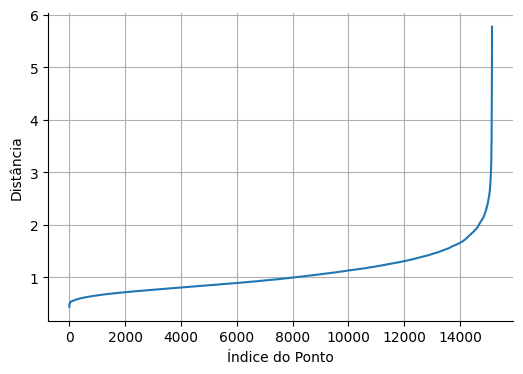

In [437]:
f, ax = plt.subplots(figsize=(6,4))

ax.plot(k_distances)

ax.set_xlabel('Índice do Ponto')
ax.set_ylabel('Distância')

sns.despine()
ax.grid(True)
plt.show()

É possível perceber, portanto, que a distância ideal está com o eps em algum ponto entre 1 e 3 (ponto de inflexão no gráfico de distância dos k-vizinhos).

Podemos então agora fazer um grid com o min_samples_range que já definimos e o eps com algum valor entre 1 e 3:

In [438]:
print(f'range do min_samples: {min_samples_range}')
eps_values = np.linspace(1, 3, 11)
print(f'range do eps: {eps_values}') 

range do min_samples: range(3, 18)
range do eps: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]


In [439]:
param_grid = []
for eps in eps_values:
  for min_samples in min_samples_range:
    param_grid.append({
        'eps': eps,
        'min_samples': min_samples
    })
print('N param', len(param_grid))


N param 165


In [440]:
best_params = None
best_score = -1

for param in param_grid:

  eps = param['eps']
  min_samples = param['min_samples']

  dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster real, sem considerar o ruído (-1 é o rótulo do ruído e 0 seria um único cluster)
  clusters_reais = set(labels) - {-1}
  if len(clusters_reais) > 1:

    score = silhouette_score(df_scaled, labels)

    print('min_samples:', min_samples)
    print('eps:', eps)
    print('Score:', score)
    print('-----------------------------------')

    if score > best_score:
      best_score = score
      best_params = param


print(f'Melhor parametros: {best_params}')
print(f'Melhor score: {best_score}')


min_samples: 3
eps: 1.0
Score: -0.3712420769972848
-----------------------------------
min_samples: 4
eps: 1.0
Score: -0.30999627718974804
-----------------------------------
min_samples: 5
eps: 1.0
Score: -0.3349971054097954
-----------------------------------
min_samples: 6
eps: 1.0
Score: -0.29463054409441236
-----------------------------------
min_samples: 7
eps: 1.0
Score: -0.2432639367131995
-----------------------------------
min_samples: 8
eps: 1.0
Score: -0.1940066168678444
-----------------------------------
min_samples: 9
eps: 1.0
Score: -0.11407353311433796
-----------------------------------
min_samples: 10
eps: 1.0
Score: -0.06795630485630376
-----------------------------------
min_samples: 11
eps: 1.0
Score: -0.014862202422998948
-----------------------------------
min_samples: 12
eps: 1.0
Score: -0.02100076424983491
-----------------------------------
min_samples: 13
eps: 1.0
Score: -0.032679050507257716
-----------------------------------
min_samples: 14
eps: 1.0
Score

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=3).fit(df_scaled)

labels_dbscan_best_silhuette = dbscan.labels_

n_ruido = np.sum(labels_dbscan_best_silhuette == -1)
percent_ruido_dbscan = n_ruido / len(labels_dbscan_best_silhuette) * 100

print(f"Quantidade de pontos de ruído - DBScan: {n_ruido}")
print(f"Percentual de ruído - DBScan: {percent_ruido_dbscan:.2f}%")
print('-----------------------------------')

n_0 = np.sum(labels_dbscan_best_silhuette == 0)
percent_0_dbscan = n_0 / len(labels_dbscan_best_silhuette) * 100

print(f"Quantidade de pontos label 0 - DBScan: {n_0}")
print(f"Percentual de pontos label 0 - DBScan: {percent_0_dbscan:.2f}%")
print('-----------------------------------')

n_1 = np.sum(labels_dbscan_best_silhuette == 1)
percent_1_dbscan = n_1 / len(labels_dbscan_best_silhuette) * 100

print(f"Quantidade de pontos label 1 - DBScan: {n_1}")
print(f"Percentual de pontos label 1 - DBScan: {percent_1_dbscan:.2f}%")



Quantidade de pontos de ruído - DBScan: 5
Percentual de ruído - DBScan: 0.03%
-----------------------------------
Quantidade de pontos label 0 - DBScan: 15141
Percentual de pontos label 0 - DBScan: 99.95%
-----------------------------------
Quantidade de pontos label 1 - DBScan: 3
Percentual de pontos label 1 - DBScan: 0.02%


Nota-se que a clusterização com o DBSCan não ficou tão boa (grande maioria dos dados em um único cluster), em grande parte em razão de o dataset em questão ter dados já muito densos, não separados por nenhum espaço de baixa densidade.
Apenas três dos mais de 15000 pontos ficaram em um cluster distinto. Analisando o contexto, percebe-se que se trata muito mais de ruído / falha na clusterização do que de outro cluster. Pode-se dizer então que a separação com DBScan não demonstrou um resultado razoável, em razão de características do Dataset e da própria ideia por trás do DBScan (depende de regiões de maior densidade separadas por regiões de menor densidade).

#### 3.2 Processo de mensuração do índice de silhueta, gráficos e número de clusters escolhido

O índice de Silhueta é uma medida que permite medir a qualidade de cluster, por meio de conceitos de **coesão** e **separação**. Quanto mais coeso aquele ponto estiver do seu cluster, e mais separado dos demais, maior será o índice de Silhueta. 

A silhueta é calculada para cada ponto $i$ pela fórmula:
$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$
Em que $a(i)$ é a distância média entre $i$ e os demais pontos do mesmo cluster e $b(i)$ é a menor distância média entre $i$ e os pontos de outros clusters (ou seja, o cluster mais próximo).

A Silhueta global é calculada pela média: $ S = \frac{1}{n}\sum s(i) $

No caso deste trabalho, para calcular o índice de silhueta utilizamos a função silhouette_score, disponível na biblioteca sklearn.metrics. Foi possível utilizar ainda a função silhouette_samples da mesma biblioteca, a fim de encontrar os coeficientes individuais de Silhueta para plotar os gráficos.

##### Número de clusters escolhido

Conforme bem explicado no item 3.1, tanto para o K-Means quanto para o DBScan, o número ideal encontrado de clusters foi com k = 2. Essa configuração foi a que maximizou o Índice de Silhueta tanto para o K-Means quanto para o DBScan.

Para o K-Means, foi encontrado Índice de Silhueta máximo = 0.2154 com k = 2.
Para o DBSCan, foi encontrado Índice de Silhueta máximo = 0.5824 com k = 2 (min_samples = 3 e eps = 3).

##### Gráficos

Seguem os gráficos, primeiro para o K-Means:



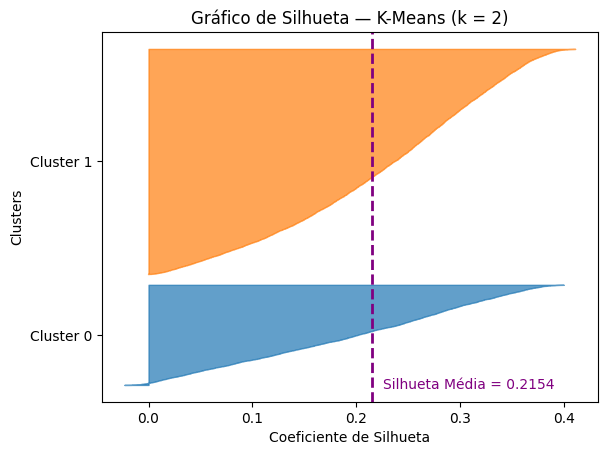

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

silhouette_coefficients_kmeans = silhouette_samples(df_scaled, labels_kmeans_best_silhuette)
padding = len(df_scaled) // 30
pos = padding
ticks = []
for i in range(k):
    sample_silhouette_values = silhouette_coefficients_kmeans[labels_kmeans_best_silhuette == i]
    sample_silhouette_values.sort()

    color = mpl.cm.tab10(i % 10)

    plt.fill_betweenx(
        np.arange(pos, pos + len(sample_silhouette_values)),
        0,
        sample_silhouette_values,
        alpha=0.7,
        facecolor=color,
        edgecolor=color
    )
    ticks.append(pos + len(sample_silhouette_values) // 2)
    pos += len(sample_silhouette_values) + padding

# ---- eixo Y (clusters) ----
plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter([f"Cluster {i}" for i in range(k)]))

# ---- linha da silhueta média ----
sil_avg = silhouette_score(df_scaled, labels_kmeans_best_silhuette)
plt.axvline(x=sil_avg, color='purple', linestyle='--', linewidth=2)
plt.text(sil_avg + 0.01, pos * 0.02, f"Silhueta Média = {sil_avg:.4f}", color="purple")

# ---- labels e título ----
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Clusters")
plt.title(f"Gráfico de Silhueta — K-Means (k = {k})")
plt.grid(False)

plt.show()

Em seguida para o DBScan:

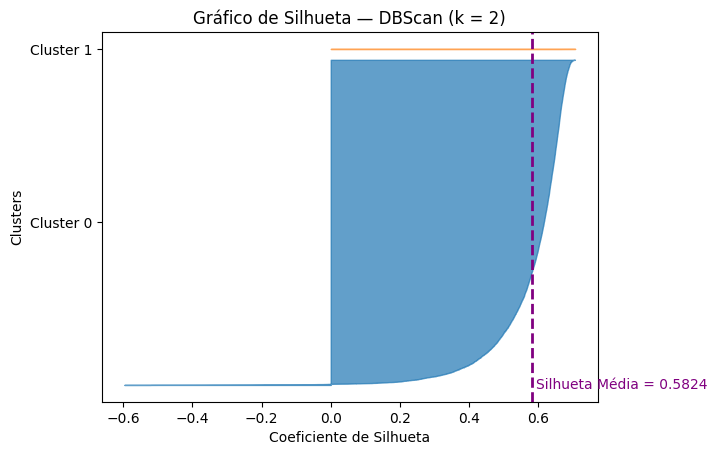

In [450]:
silhouette_coefficients_dbscan = silhouette_samples(df_scaled, labels_dbscan_best_silhuette)
padding = len(df_scaled) // 30
pos = padding
ticks = []
for i in range(k):
    sample_silhouette_values = silhouette_coefficients_dbscan[labels_dbscan_best_silhuette == i]
    sample_silhouette_values.sort()

    color = mpl.cm.tab10(i % 10)        

    plt.fill_betweenx(
        np.arange(pos, pos + len(sample_silhouette_values)),
        0,
        sample_silhouette_values,
        alpha=0.7,
        facecolor=color,
        edgecolor=color
    )
    ticks.append(pos + len(sample_silhouette_values) // 2)
    pos += len(sample_silhouette_values) + padding

# ---- eixo Y (clusters) ----
plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter([f"Cluster {i}" for i in range(k)]))

# ---- linha da silhueta média ----
sil_avg = silhouette_score(df_scaled, labels_dbscan_best_silhuette)
plt.axvline(x=sil_avg, color='purple', linestyle='--', linewidth=2)
plt.text(sil_avg + 0.01, pos * 0.02, f"Silhueta Média = {sil_avg:.4f}", color="purple")

# ---- labels e título ----
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Clusters")
plt.title(f"Gráfico de Silhueta — DBScan (k = {k})")
plt.grid(False)

plt.show()

#### 3.3 Comparação entre os dois resultados e interpretação

Percebe-se que tanto para o K-Means quanto para o DBScan, o Índice de Silhueta apontou para a melhor configuração com k = 2 (ou seja, número de cluster = 2). Inclusive, a Silhueta para essa configuração de k = 2 (com min_samples = 3 e eps = 3) no DBScan foi superior à Silhueta medida no K-Means. Enquanto a Silhueta média medida no K-Means foi de 0.2154, a Silhueta média medida no DBScan foi de 0.5824. 

Esse resultado, à primeira vista, pode parecer muito favorável para o DBScan. Todavia, quando analisamos mais atentamente, percebe-se que apesar de no DBscan ele ter conseguido separar em dois clusters (desconsiderando o ruído), a grande maioria dos dados foi de apenas um cluster:


- Percentual de ruído - DBScan: 0.03%
- Percentual de pontos label 0 - DBScan: 99.95%
- Percentual de pontos label 1 - DBScan: 0.02%

Ou seja, a separação não foi tão bem sucedida usando DBScan. Isso se deve provavelmente à característica do método de separação usando DBScan: trata-se de um método baseado em regiões de alta densidade separadas por regiões de baixa densidade. Pode-se assumir que, no dataset em questão, não existe uma separação com regiões de baixa densidade, e por isso as músicas ficaram quase todas agrupadas em um único cluster. Não há uma falha na execução e nem no método em si: apenas o dataset em questão não é o mais indicado para uso do DBScan.

Por sua vez, o resultado com K-Means, apesar de apenas 0.2154 de Silhueta, foi bem mais robusto:

- Percentual de pontos label 0 - K-Means: 30.79%
- Percentual de pontos label 1 - K-Means: 69.21%

Também foi possível interpretar o resultado do K-Means de maneira robusta e assertiva, comparando os centroides dos dois clusters. Notou-se que um dos clusters do K-Means (cluster 0) contém músicas com instrumentos mais orgânicos, com menos energia e com foco maior na acústica; enquanto o outro cluster (cluster 1) contém músicas com elementos mais modernos, enérgicos e vibrantes.

#### Complemento - Visualização via t-SNE

A fim de permitir uma visualização interativa, apenas como complemento, vamos utilizar o t-SNE, uma técnica...

O resultado de forma interativa pode ser visualizado em: https://roriblim.github.io/PD-validacao-clusterizacao/src/tsne_clusters.html

In [444]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, perplexity=35, random_state=42)
tsne_emb = tsne.fit_transform(df_scaled)

df_plot = pd.DataFrame({
    "TSNE1": tsne_emb[:,0],
    "TSNE2": tsne_emb[:,1],
    "Cluster": labels_kmeans_best_silhuette,
    "Musica": df["Track"] + " - " + df["Artist"]
})

fig = px.scatter(
    df_plot,
    x="TSNE1",
    y="TSNE2",
    color="Cluster",
    hover_name="Musica",
    color_continuous_scale="Turbo",
    title="Músicas clusterizadas com K-Means - visualização interativa via t-SNE"
)

fig.update_layout(height=900, width=1200)
fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()

# Gerar HTML e adicionar rodapé com referências
html = fig.to_html(full_html=True, include_plotlyjs='cdn')

footer_html = """
<div style="font-size:14px; margin:20px 0 40px 0; padding-top:10px; border-top:1px solid #e1e1e1;">
  <strong>Fonte dos dados:</strong>
  <a href="https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023" target="_blank" rel="noopener">Kaggle — 10400 Classic Hits (10 genres)</a>
  <br>
  <strong>Projeto:</strong>
  <a href="https://github.com/roriblim/PD-validacao-clusterizacao" target="_blank" rel="noopener">GitHub — PD-validacao-clusterizacao</a>
</div>
"""

parts = html.rsplit("</body>", 1)
if len(parts) == 2:
    html_with_footer = parts[0] + footer_html + "</body>" + parts[1]
else:
    html_with_footer = html + footer_html

with open("tsne_clusters.html", "w", encoding="utf-8") as f:
    f.write(html_with_footer)
